In [1]:
%load_ext nb_mypy

Version 1.0.5


# An Interpreter for a Simple Programming Language

In this notebook we develop an interpreter for a small programming language.

In [2]:
import ply.lex as lex

In [3]:
tokens = [ 'NUMBER',    # r'0|[1-9][0-9]*'
           'ID',        # r'[a-zA-Z][a-zA-Z0-9_]*'
           'ASSIGN',    # r':='
           'EQ',        # r'=='
           'NE',        # r'!='
           'LE',        # r'<='
           'GE',        # r'>='
           'IF',        # see below
           'WHILE'      # see below
          ]

We allow both *single-line comments* and *multi-line comments*.
- The regular expression `/\*(.|\n)*?\*/` recognizes multi-line comments.
  Multi-line comments start with the string `/*` and end with the string `*/`.
  Note the use of the *non-greedy* quantor `*?`.  If we have code like
  ```
  /* blah */ a = 1; /* blub */
  ```
  the greedy quantor would recognize the whole line as one comment. 
- The regular expression `//.*` recognizes single-line comments.
  A single line comment starts with the string `//` and extends to the end of the line.

In [4]:
def t_COMMENT(t):
    r'(/\*(.|\n)*?\*/)|(//.*)'
    t.lexer.lineno += t.value.count('\n')
    pass

The token `NUMBER` specifies a natural number.

In [5]:
def t_NUMBER(t):
    r'0|[1-9][0-9]*'
    t.value = int(t.value)
    return t

In [6]:
t_ASSIGN = r':='
t_EQ     = r'=='
t_NE     = r'!='
t_LE     = r'<='
t_GE     = r'>='

The keywords 'int', 'if', 'else', 'while', 'return' have to be dealt with separately as they are syntactical identical to identifiers. The dictionary Keywords shown below maps every keyword to its token type.

In [7]:
Keywords = { 'if': 'IF', 'while': 'WHILE' }

When an identifier is read, we first have to check whether the identifier is one of our keywords.  If so, we assign the corresponding token type that is stored in the dictionary `Keywords`.  Otherwise, the token type is set to `ID`.

In [8]:
def t_ID(t):
    r'[a-zA-Z][a-zA-Z0-9_]*'
    t.type = Keywords.get(t.value, 'ID')
    return t

Operators consisting of a single character do not need an associated token type.
They are declared via the keyword `literals`.

In [9]:
literals = ['+', '-', '*', '/', '%', '(', ')', '{', '}', ';', '<', '>', '!', ',']

White space, i.e. *space characters*, *tabulators*, and *carriage returns* are ignored. 

In [10]:
t_ignore  = ' \t\r'

Syntactically, newline characters are ignored. However, we still need to keep track of them in order to know the current line number, which is used for error messages.

In [11]:
def t_newline(t):
    r'\n'
    t.lexer.lineno += 1
    return

Given a `token`, the function `find_colum` returns the column where `token` starts.  This is possible, because every token contains a reference to the current lexer as `token.lexer` and this lexer in turn stores the string that is given to it via the reference `lexer.lexdata`.  Furthermore, `token.lexpos` is the number of characters that precede `token`.

In [12]:
def find_column(token):
    program    = token.lexer.lexdata  # the complete string given to the scanner
    line_start = program.rfind('\n', 0, token.lexpos)
    return token.lexpos - line_start

The function `t_error` is called for any token `t` that can not be scanned by the lexer.  In this case, `t.value[0]` is the first character that is not recognized by the scanner.  This character is discarded.  After that, scanning proceeeds as if nothing has happened.

In [13]:
def t_error(t):
    column = find_column(t)
    print(f"Illegal character '{t.value[0]}' in line {t.lineno}, column {column}.")
    t.lexer.skip(1)

In [14]:
__file__ = 'main'

In [15]:
lexer = lex.lex()

In [16]:
def test_scanner(file_name):
    with open(file_name, 'r') as handle:
        program = handle.read() 
    print(program)
    lexer.input(program)
    lexer.lineno = 1          # reset line number
    for t in lexer:           # start scanning and collect all tokens
        print(t) 

In [17]:
test_scanner('sum.sl')

n := read();
s := 0;
i := 0;
while (i < n * n) {
    i := i + 1;
    s := s + i;
}
print(s);

LexToken(ID,'n',1,0)
LexToken(ASSIGN,':=',1,2)
LexToken(ID,'read',1,5)
LexToken((,'(',1,9)
LexToken(),')',1,10)
LexToken(;,';',1,11)
LexToken(ID,'s',2,13)
LexToken(ASSIGN,':=',2,15)
LexToken(NUMBER,0,2,18)
LexToken(;,';',2,19)
LexToken(ID,'i',3,21)
LexToken(ASSIGN,':=',3,23)
LexToken(NUMBER,0,3,26)
LexToken(;,';',3,27)
LexToken(WHILE,'while',4,29)
LexToken((,'(',4,35)
LexToken(ID,'i',4,36)
LexToken(<,'<',4,38)
LexToken(ID,'n',4,40)
LexToken(*,'*',4,42)
LexToken(ID,'n',4,44)
LexToken(),')',4,45)
LexToken({,'{',4,47)
LexToken(ID,'i',5,53)
LexToken(ASSIGN,':=',5,55)
LexToken(ID,'i',5,58)
LexToken(+,'+',5,60)
LexToken(NUMBER,1,5,62)
LexToken(;,';',5,63)
LexToken(ID,'s',6,69)
LexToken(ASSIGN,':=',6,71)
LexToken(ID,'s',6,74)
LexToken(+,'+',6,76)
LexToken(ID,'i',6,78)
LexToken(;,';',6,79)
LexToken(},'}',7,81)
LexToken(ID,'print',8,83)
LexToken((,'(',8,88)
LexToken(ID,'s',8,89)
LexToken(),')',8,90)
Le

In [18]:
test_scanner('factorial.sl')

f := 1;
i := 0;
n := read();
while (i < n) {
    i := i + 1;
    f := i * f;
}
print(f);


LexToken(ID,'f',1,0)
LexToken(ASSIGN,':=',1,2)
LexToken(NUMBER,1,1,5)
LexToken(;,';',1,6)
LexToken(ID,'i',2,8)
LexToken(ASSIGN,':=',2,10)
LexToken(NUMBER,0,2,13)
LexToken(;,';',2,14)
LexToken(ID,'n',3,16)
LexToken(ASSIGN,':=',3,18)
LexToken(ID,'read',3,21)
LexToken((,'(',3,25)
LexToken(),')',3,26)
LexToken(;,';',3,27)
LexToken(WHILE,'while',4,29)
LexToken((,'(',4,35)
LexToken(ID,'i',4,36)
LexToken(<,'<',4,38)
LexToken(ID,'n',4,40)
LexToken(),')',4,41)
LexToken({,'{',4,43)
LexToken(ID,'i',5,49)
LexToken(ASSIGN,':=',5,51)
LexToken(ID,'i',5,54)
LexToken(+,'+',5,56)
LexToken(NUMBER,1,5,58)
LexToken(;,';',5,59)
LexToken(ID,'f',6,65)
LexToken(ASSIGN,':=',6,67)
LexToken(ID,'i',6,70)
LexToken(*,'*',6,72)
LexToken(ID,'f',6,74)
LexToken(;,';',6,75)
LexToken(},'}',7,77)
LexToken(ID,'print',8,79)
LexToken((,'(',8,84)
LexToken(ID,'f',8,85)
LexToken(),')',8,86)
LexToken(;,';',8,87)


In [19]:
import ply.yacc as yacc

Below is the grammar for our language:
```
program
    : /* epsilon */
    | stmnt program
    
stmnt 
    : IF '(' bool_expr ')' stmnt                 
    | WHILE '(' bool_expr ')' stmnt
    | '{' stmnt_list '}' 
    | ID ':=' expr ';'  
    | expr ';'       

bool_expr 
    : expr '==' expr     
    | expr '!=' expr     
    | expr '<=' expr     
    | expr '>=' expr     
    | expr '<'  expr      
    | expr '>'  expr     
 
expr: expr '+' product                 
    | expr '-' product
    | product
              
product
    : product '*' factor               
    | product '/' factor
    | product '%' factor 
    | factor

factor
    : '(' expr ')' 
    | NUMBER
    | ID
    | ID '(' expr_list ')'

expr_list
    :
    | expr ',' ne_expr_list

ne_expr_list
    : expr
    | expr ',' ne_expr_list
```

The *start variable* of our grammar is `program`.

In [20]:
start = 'program'

An example program that conforms to this grammar is stored in the file `sum.sl`.

In [21]:
!cat sum.sl

n := read();
s := 0;
i := 0;
while (i < n * n) {
    i := i + 1;
    s := s + i;
}
print(s);


A program is a list of statements.

In [22]:
def p_program_one(p):
    "program : stmnt_list"
    p[0] = p[1]

In [23]:
def p_stmnt_list_empty(p):
    "stmnt_list : "
    p[0] = ('.',)

def p_stmnt_list_more(p):
    "stmnt_list : stmnt stmnt_list"
    p[0] = ('.', p[1]) + p[2][1:]

In [24]:
def p_stmnt_if(p):
    "stmnt : IF '(' bool_expr ')' stmnt"
    p[0] = ('if', p[3], p[5])   

def p_stmnt_while(p):
    "stmnt : WHILE '(' bool_expr ')' stmnt"
    p[0] = ('while', p[3], p[5])
    
def p_stmnt_block(p):
    "stmnt : '{' stmnt_list '}'"
    p[0] = p[2]
    
def p_stmnt_assign(p):
    "stmnt : ID ASSIGN expr ';'"
    p[0] = (':=', p[1], p[3])
   
def p_stmnt_expr(p):
    "stmnt : expr ';'"
    p[0] = p[1]

In [25]:
def p_bool_expr_eq(p):
    "bool_expr : expr EQ expr"
    p[0] = ('==', p[1], p[3])

def p_bool_expr_ne(p):
    "bool_expr : expr NE expr"
    p[0] = ('!=', p[1], p[3])

def p_bool_expr_le(p):
    "bool_expr : expr LE expr"
    p[0] = ('<=', p[1], p[3])
    
def p_bool_expr_ge(p):
    "bool_expr : expr GE expr"
    p[0] = ('>=', p[1], p[3])
    
def p_bool_expr_lt(p):
    "bool_expr : expr '<' expr"
    p[0] = ('<', p[1], p[3])

def p_bool_expr_gt(p):
    "bool_expr : expr '>' expr"
    p[0] = ('>', p[1], p[3])

In [26]:
def p_expr_plus(p):
    "expr : expr '+' product"
    p[0] = ('+', p[1], p[3])
    
def p_expr_minus(p):
    "expr : expr '-' product"
    p[0] = ('-', p[1], p[3])

def p_expr_product(p):
    "expr : product"
    p[0] = p[1]
    
def p_product_times(p):
    "product : product '*' expr"
    p[0] = ('*', p[1], p[3])
    
def p_product_divide(p):
    "product : product '/' expr"
    p[0] = ('/', p[1], p[3])

def p_product_modulo(p):
    "product : product '%' factor"
    p[0] = ('%', p[1], p[3])

def p_product_factor(p):
    "product : factor"
    p[0] = p[1]

def p_factor_paren(p):
    "factor : '(' expr ')'"
    p[0] = p[2]

def p_factor_number(p):
    "factor : NUMBER"
    p[0] = p[1]

def p_factor_id(p):
    "factor : ID"
    p[0] = p[1]

def p_factor_fct_call(p):
    "factor : ID '(' expr_list ')'"
    p[0] = ('call', p[1]) + p[3][1:]

In [27]:
def p_expr_list_empty(p):
    "expr_list : "
    p[0] = ('.',)
    
def p_expr_list_one(p):
    "expr_list : expr"
    p[0] = ('.', p[1])     

def p_expr_list_more(p):
    "expr_list : expr ',' ne_expr_list"
    p[0] = ('.', p[1]) + p[3][1:]     

def p_ne_expr_list_one(p):
    "ne_expr_list : expr"
    p[0] = ('.', p[1]) 
    
def p_ne_expr_list_more(p):
    "ne_expr_list : expr ',' ne_expr_list"
    p[0] = ('.', p[1]) + p[3][1:] 

In [28]:
def p_error(t):
    column = find_column(t)
    if t:
        print(f'Syntax error at token "{t.value}" in line {t.lineno}, column {column}.')
    else:
        print('Syntax error at end of input.')

In [30]:
parser = yacc.yacc()

The parser shown above will transform the program `sum.sl` into the *nested tuple* stored in the file `sum.ast`.

In [31]:
%run AST-2-Dot.ipynb

The function `parse` takes a `file_name` as ist sole argument.  The file is read and parsed. 
The resulting parse tree is visualized using `graphviz`.  It is important to reset the
attribute `lineno` of the scanner, for otherwise error messages will not have the correct line numbers.

In [32]:
def parse(file_name):
    lexer.lineno = 1
    with open(file_name, 'r') as handle:
        program = handle.read() 
    ast = yacc.parse(program)
    print(ast)
    return tuple2dot(ast)

('.', (':=', 'n', ('call', 'read')), (':=', 's', 0), (':=', 'i', 0), ('while', ('<', 'i', ('*', 'n', 'n')), ('.', (':=', 'i', ('+', 'i', 1)), (':=', 's', ('+', 's', 'i')))), ('call', 'print', 's'))


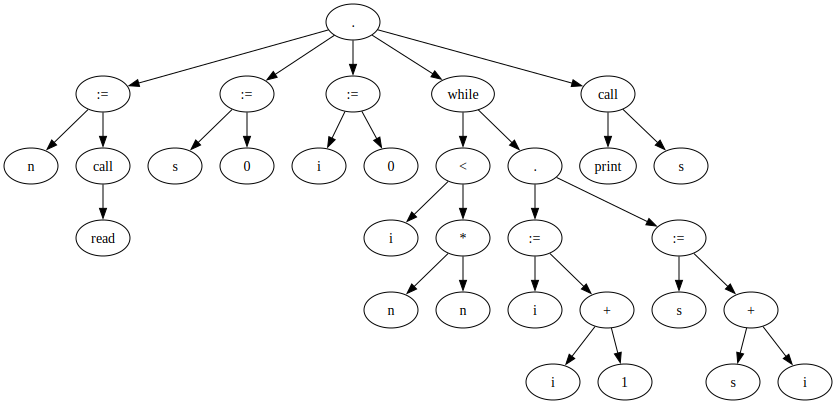

In [33]:
parse('sum.sl')

In [34]:
from typing import TypeVar
NestedTuple = TypeVar('NestedTuple')
NestedTuple = int | str | tuple[NestedTuple, ...]
Number      = int | float

We need some forward declarations.

In [35]:
def execute(stmnt: NestedTuple, Values: dict[str, Number]) -> None:
    return None

In [36]:
def evaluate(expr: NestedTuple, Values: dict[str, Number]) -> Number:
    return None # type: ignore

In [37]:
def evaluate_bool(expr: NestedTuple, Values: dict[str, Number]) -> bool:
    return None # type: ignore

The function `execute_tuple` takes two arguments:
- `Statement_List` is a list of statements,
- `Values` is a dictionary assigning integer values to variable names.

The function executes the statements in `Statement_List`.  If an assignment statement is executed,
the dictionary `Values` is updated.

In [38]:
def execute_tuple(Statement_List: tuple[NestedTuple, ...], Values: dict[str, Number]={}) -> None:
    for stmnt in Statement_List:
        execute(stmnt, Values)

The function `execute` takes two arguments:
- `stmnt` is a statement,
- `Values` is a dictionary assigning values to variable names.

The function executes the statements in `Statement_List`.  If an assignment statement is executed,
the dictionary `Values` is updated.

In [39]:
def execute(stmnt: NestedTuple, Values: dict[str, Number]) -> None:
    match stmnt:
        case ('.', *SL):
            execute_tuple(tuple(SL), Values)
        case (':=', var, value):
            Values[var] = evaluate(value, Values)
        case ('call', 'print', expr):
            print(evaluate(expr, Values))
        case ('if', test, stmnt):
            if evaluate_bool(test, Values):
                execute(stmnt, Values)
        case ('while', test, stmnt):
            while evaluate_bool(test, Values):
                execute(stmnt, Values)
        case _:
            assert False, f'{stmnt} unexpected'

The function `evaluate_bool` takes two arguments:
- `expr` is a boolean expression expression,
- `Values` is a dictionary assigning integer values to variable names.

The function evaluates the given expression and returns this value.

In [40]:
def evaluate_bool(expr: NestedTuple, Values: dict[str, Number]) -> bool:
    match expr:
        case ('==', lhs, rhs):
            return evaluate(lhs, Values) == evaluate(rhs, Values)
        case ('!=', lhs, rhs):
            return evaluate(lhs, Values) != evaluate(rhs, Values)
        case ('<=', lhs, rhs):
            return evaluate(lhs, Values) <= evaluate(rhs, Values)
        case ('>=', lhs, rhs):
            return evaluate(lhs, Values) >= evaluate(rhs, Values)
        case ('<', lhs, rhs):
            return evaluate(lhs, Values) <  evaluate(rhs, Values)
        case ('>', lhs, rhs):
            return evaluate(lhs, Values) >  evaluate(rhs, Values)
        case _:
            assert False, f'{expr} unexpected'

The function `evaluate` takes two arguments:
- `expr` is a logical expression or an arithmetic expression,
- `Values` is a dictionary assigning integer values to variable names.

The function evaluates the given expression and returns this value.

In [41]:
def evaluate(expr: NestedTuple, Values: dict[str, Number]) -> Number:
    match expr:
        case int():
            return expr
        case str():
            return Values[expr] 
        case ('call', 'read'):
            return int(input('Please enter a natural number: '))
        case ('+', lhs, rhs):
            return evaluate(lhs, Values) + evaluate(rhs, Values)
        case ('-', lhs, rhs):
            return evaluate(lhs, Values) - evaluate(rhs, Values)
        case ('*', lhs, rhs):
            return evaluate(lhs, Values) * evaluate(rhs, Values)
        case ('/', lhs, rhs):
            return evaluate(lhs, Values) / evaluate(rhs, Values)
        case ('%', lhs, rhs):
            return evaluate(lhs, Values) % evaluate(rhs, Values)
        case _:
            assert False, f'{expr} unexpected'

In [42]:
!cat sum.sl

n := read();
s := 0;
i := 0;
while (i < n * n) {
    i := i + 1;
    s := s + i;
}
print(s);


In [45]:
def main(file):
    with open(file, 'r') as handle:
        program = handle.read() 
    stmnt = yacc.parse(program)
    print(stmnt)
    Values = {}
    execute(stmnt, Values)

In [46]:
main('sum.sl')

('.', (':=', 'n', ('call', 'read')), (':=', 's', 0), (':=', 'i', 0), ('while', ('<', 'i', ('*', 'n', 'n')), ('.', (':=', 'i', ('+', 'i', 1)), (':=', 's', ('+', 's', 'i')))), ('call', 'print', 's'))


Please enter a natural number:  6


666


In [47]:
!cat factorial.sl

f := 1;
i := 0;
n := read();
while (i < n) {
    i := i + 1;
    f := i * f;
}
print(f);



In [48]:
main('factorial.sl')

('.', (':=', 'f', 1), (':=', 'i', 0), (':=', 'n', ('call', 'read')), ('while', ('<', 'i', 'n'), ('.', (':=', 'i', ('+', 'i', 1)), (':=', 'f', ('*', 'i', 'f')))), ('call', 'print', 'f'))


Please enter a natural number:  7


5040
